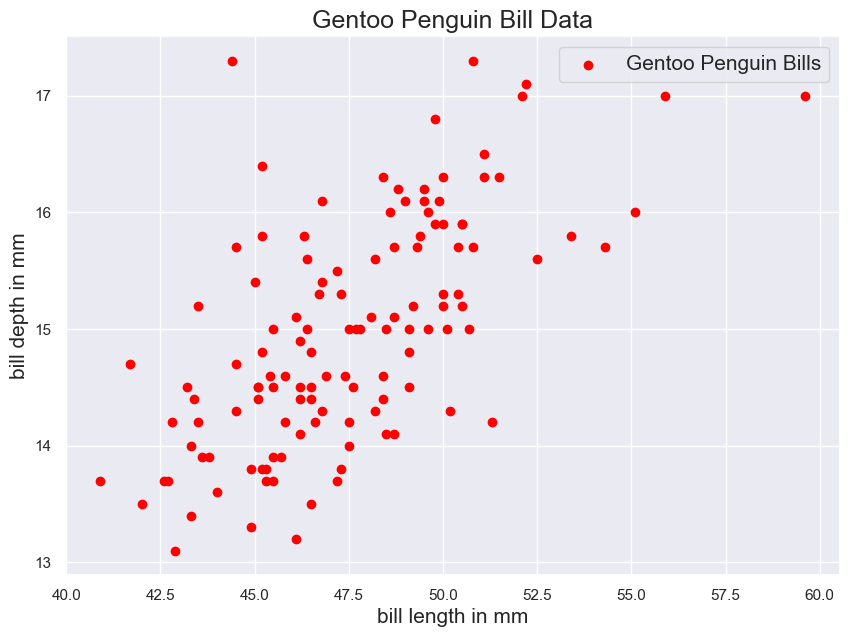

In [19]:
#hello 
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

import seaborn as sns
sns.set_theme()

df = pd.read_csv(r"C:\Users\faith\inde 577\577repo\Supervised Learning\Datasets\palmer_penguins.csv")
df = df.iloc[220:][["bill_length_mm", "bill_depth_mm"]]
plt.figure(figsize = (10, 7))
plt.scatter(df.bill_length_mm, 
            df.bill_depth_mm, 
            color = "red",
            label = "Gentoo Penguin Bills")
plt.xlabel("bill length in mm", fontsize = 15)
plt.ylabel("bill depth in mm", fontsize = 15)
plt.legend(fontsize = 15)
plt.title("Gentoo Penguin Bill Data", fontsize = 18)
plt.show()


In [20]:
class SingleNeuron(object):
    """
    A class used to represent a single artificial neuron. 

    ...

    Attributes
    ----------
    activation_function : function
        The activation function applied to the preactivation linear combination.

    w_ : numpy.ndarray
        The weights and bias of the single neuron. The last entry being the bias. 
        This attribute is created when the train method is called.

    errors_: list
        A list containing the mean sqaured error computed after each iteration 
        of stochastic gradient descent per epoch. 

    Methods
    -------
    train(self, X, y, alpha = 0.005, epochs = 50)
        Iterates the stochastic gradient descent algorithm through each sample 
        a total of epochs number of times with learning rate alpha. The data 
        used consists of feature vectors X and associated labels y. 

    predict(self, X)
        Uses the weights and bias, the feature vectors in X, and the 
        activation_function to make a y_hat prediction on each feature vector. 
    """
    def __init__(self, activation_function):
        self.activation_function = activation_function

    def train(self, X, y, alpha = 0.005, epochs = 50):
        self.w_ = np.random.rand(1 + X.shape[1])
        self.errors_ = []
        N = X.shape[0]

        for _ in range(epochs):
            errors = 0
            for xi, target in zip(X, y):
                error = (self.predict(xi) - target)
                self.w_[:-1] -= alpha*error*xi
                self.w_[-1] -= alpha*error
                errors += .5*(error**2)
            self.errors_.append(errors/N)
        return self

    def predict(self, X):
        preactivation = np.dot(X, self.w_[:-1]) + self.w_[-1]
        return self.activation_function(preactivation)


---

### - Quick Data Formatting

Now that we have defined our custom ```SingleNeuron``` class, we next prep our data for training. By running the following code in the cell below, note that the first two lines of code convert the setosa sepal length column of data into a ```numpy.ndarray```. 

**CAUTION:** Single entry feature vectors need to be reshaped using the ```reshape(-1, 1)``` method. This is needed because of the dimensions required for vector and matrix multiplications.

The third line converts the setosa sepal width column of data to a ```numpy.ndarray```. 
```python
X = df.sepal_length.values
X = X.reshape(-1, 1)
y = df.sepal_width.values
```

---

In [21]:
X = df.bill_length_mm.values
X = X.reshape(-1, 1)
y = df.bill_depth_mm.values

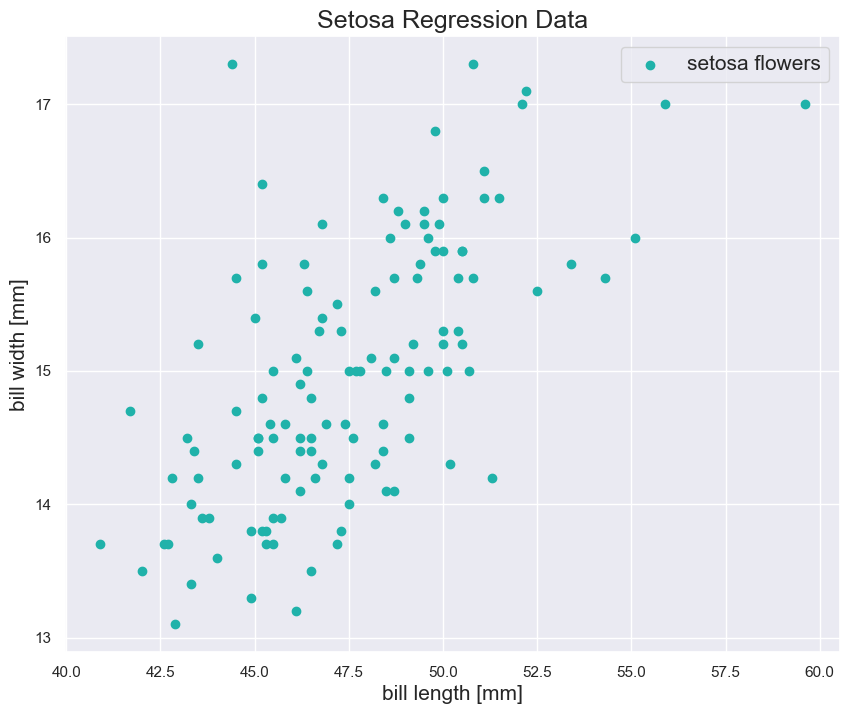

In [22]:
plt.figure(figsize = (10, 8))
plt.scatter(X, y, color = "lightseagreen", label = "setosa flowers")
plt.xlabel("bill length [mm]", fontsize = 15)
plt.ylabel("bill width [mm]", fontsize = 15)
plt.title("Setosa Regression Data", fontsize = 18)
plt.legend(fontsize = 15)
plt.show()

In [23]:
def linear_activation(z):
    return z

node = SingleNeuron(linear_activation)
node.train(X, y, alpha = 0.0001, epochs = 5)

---

Now that we have created an instance of the ```SingleNeuron``` class and called the train method, we can visualize the linear regression line by scatter plotting the data and also ploting the predicted output over some domain within the range of values of input features. Do this by running the following code in the cell below (don't forget that since we are dealing with single measurement features, we must reshape the domain for predicting). 
```python
domain = np.linspace(np.min(X) - .5, np.max(X) + .5, 100)


plt.figure(figsize = (10, 8))
plt.scatter(X, y, color = "lightseagreen", label = "setosa flowers")
plt.plot(domain, node.predict(domain.reshape(-1, 1)))
plt.xlabel("sepal length [cm]", fontsize = 15)
plt.ylabel("sepal width [cm]", fontsize = 15)
plt.title("Setosa Regression Data", fontsize = 18)
plt.legend(fontsize = 15)
plt.show()
```


---

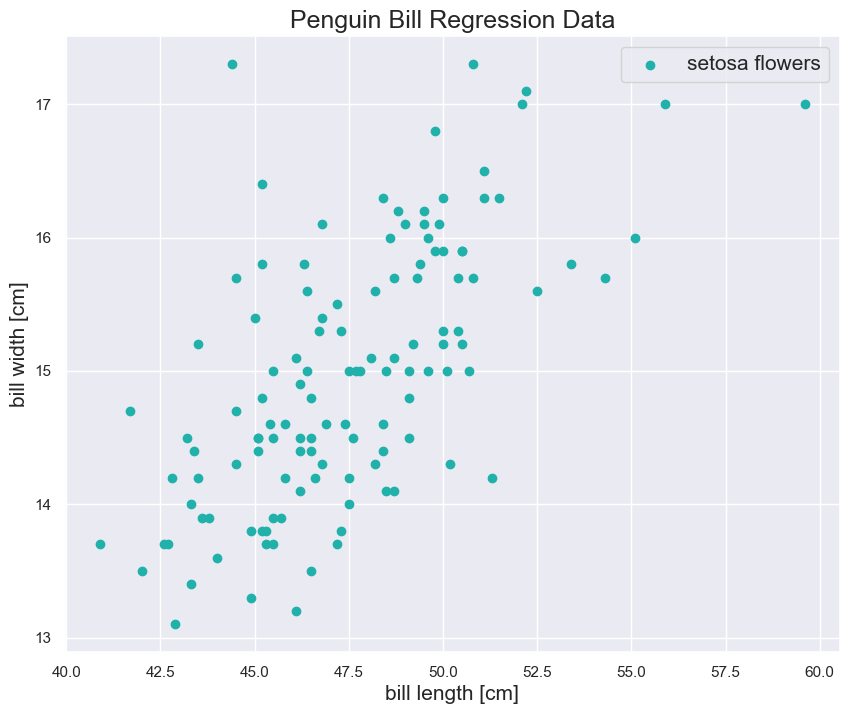

In [24]:
domain = np.linspace(np.min(X) - .5, np.max(X) + .5, 100)


plt.figure(figsize = (10, 8))
plt.scatter(X, y, color = "lightseagreen", label = "setosa flowers")
plt.plot(domain, node.predict(domain.reshape(-1, 1)))
plt.xlabel("bill length [cm]", fontsize = 15)
plt.ylabel("bill width [cm]", fontsize = 15)
plt.title("Penguin Bill Regression Data", fontsize = 18)
plt.legend(fontsize = 15)
plt.show()

---

The line generated by our custom ```SingleNeuron``` class surely does not look random! We can verify this by plotting the ```errors_``` attribute that we stored while training. Note that the $i$-th entry of the ```errors_``` attribute is the *mean-sqaured error* of the neuron after the $i+1$ epoch of stochastic gradient descent. If the mean sqaured error is decreasing after each epoch we are on the right track, and our single neuron might be learning! 

We can visualize the mean-sqaured error at each epoch of our training process by running the following code in the cell below. 
```python
plt.figure(figsize = (10, 8))
plt.plot(range(1, len(node.errors_) + 1), 
         node.errors_,
         marker = "o",
         label = "MSE")
plt.xlabel("epochs", fontsize = 15)
plt.ylabel("MSE", fontsize = 15)
plt.xticks(range(1, len(node.errors_) + 1))
plt.legend(fontsize = 15)
plt.title("MSE Error at Each Epoch During Training", fontsize = 18)
plt.show()

```

---

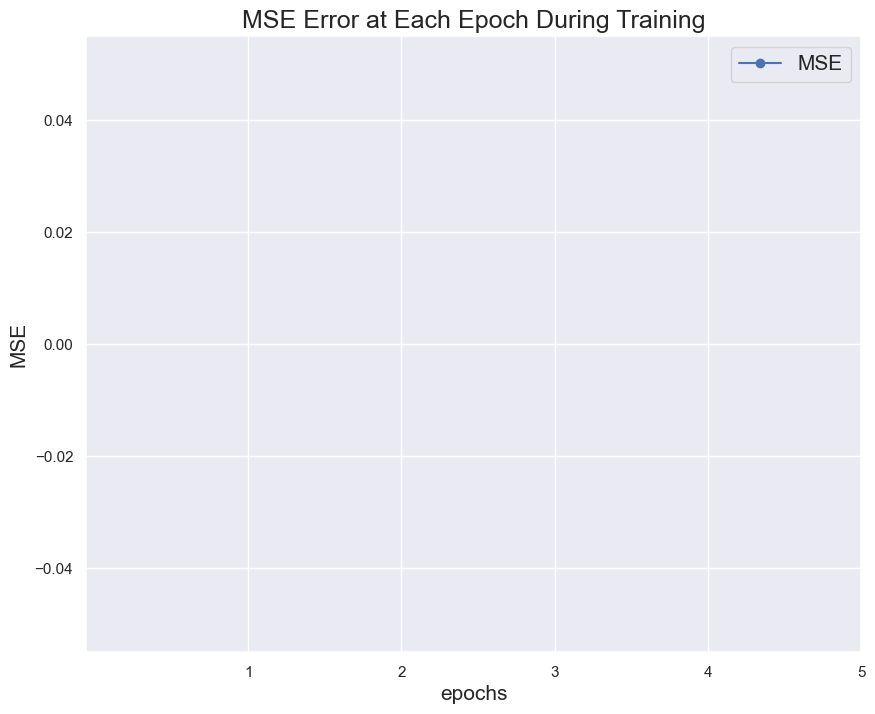

In [25]:
plt.figure(figsize = (10, 8))
plt.plot(range(1, len(node.errors_) + 1), 
         node.errors_,
         marker = "o",
         label = "MSE")
plt.xlabel("epochs", fontsize = 15)
plt.ylabel("MSE", fontsize = 15)
plt.xticks(range(1, len(node.errors_) + 1))
plt.legend(fontsize = 15)
plt.title("MSE Error at Each Epoch During Training", fontsize = 18)
plt.show()

---

### - Visualize your Errors over each Epoch

The mean-sqaured error is decreasing over each epoch! Next lets see what happens when we  training a single neuron over 10 times more epochs than before, while leaving the learning rate unchanged. Try running the following code in the cell below (note the use of the subplots). 
```python
node = SingleNeuron(linear_activation)
node.train(X, y, alpha = .0001, epochs = 50)

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15,10))

ax1.scatter(X, y, color = "lightseagreen")
ax1.plot(domain, node.predict(domain.reshape(-1, 1)))
ax1.set_xlabel("sepal length [cm]", fontsize = 15)
ax1.set_ylabel("sepal width [cm]", fontsize = 15)
ax1.set_title("Setosa Regression Data", fontsize = 18)

ax2.plot(range(1, len(node.errors_) + 1), 
         node.errors_,
         marker = "o",
         label = "MSE")
ax2.set_xlabel("epochs")
ax2.set_ylabel("MSE")
ax2.set_xticks(range(1, len(node.errors_) + 1, 5))
ax2.legend(fontsize = 10)
ax2.set_title("MSE Error at Each Epoch During Training", fontsize = 18)
```

---

Text(0.5, 1.0, 'MSE Error at Each Epoch During Training')

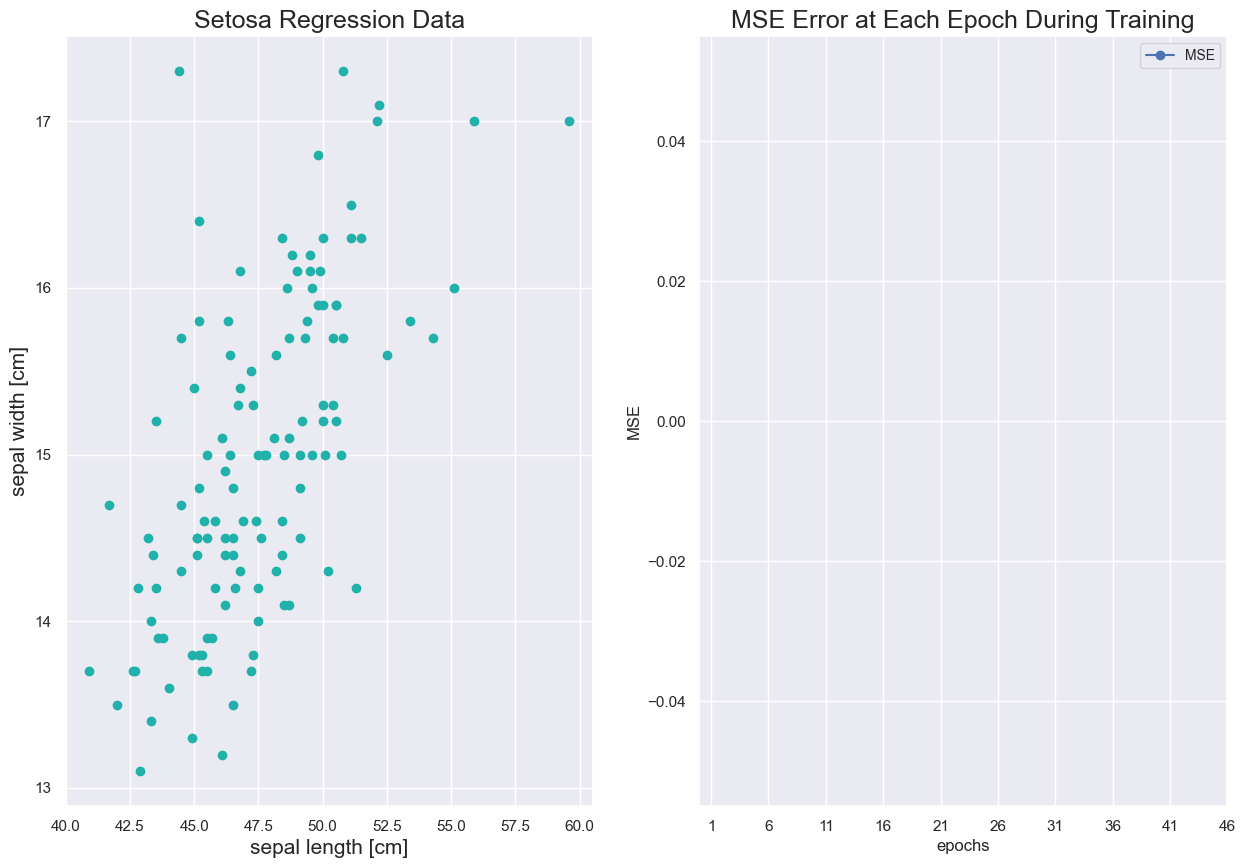

In [26]:
node = SingleNeuron(linear_activation)
node.train(X, y, alpha = .0001, epochs = 50)

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15,10))

ax1.scatter(X, y, color = "lightseagreen")
ax1.plot(domain, node.predict(domain.reshape(-1, 1)))
ax1.set_xlabel("sepal length [cm]", fontsize = 15)
ax1.set_ylabel("sepal width [cm]", fontsize = 15)
ax1.set_title("Setosa Regression Data", fontsize = 18)

ax2.plot(range(1, len(node.errors_) + 1), 
         node.errors_,
         marker = "o",
         label = "MSE")
ax2.set_xlabel("epochs")
ax2.set_ylabel("MSE")
ax2.set_xticks(range(1, len(node.errors_) + 1, 5))
ax2.legend(fontsize = 10)
ax2.set_title("MSE Error at Each Epoch During Training", fontsize = 18)


---

## 4.2.3 Experiment with the Learning Rate 
As discussed in a previous notebook, the choice of learning rate is a crucial *hyperparamter* when implementing gradient (and stochastic gradient) descent. We can view different choices of learning rate with a fixed number of epochs by running the following code in the cell below.
```python
# Possible choices of learning rate 
alphas = [0.01, 0.05, 0.07, 0.09]

domain = np.linspace(np.min(X) - .5, np.max(X) + .5, 100)

# Call the subplots method for plotting a grid of figures
fig, axs = plt.subplots(2, 2, figsize=(10,10))

# Loop over the axs and alpha values
for ax, alpha in zip(axs.flat, alphas):
    node = SingleNeuron(linear_activation)
    node.train(X, y, alpha = alpha, epochs = 55)
    ax.plot(domain, node.predict(domain.reshape(-1, 1)))
    ax.scatter(X, y, color = "lightseagreen")
    ax.set_title(f"alpha = {alpha}", fontsize = 18)
```



---

C:\Users\faith\AppData\Local\Temp\ipykernel_1748\654729082.py:45: RuntimeWarning: overflow encountered in scalar power
  errors += .5*(error**2)


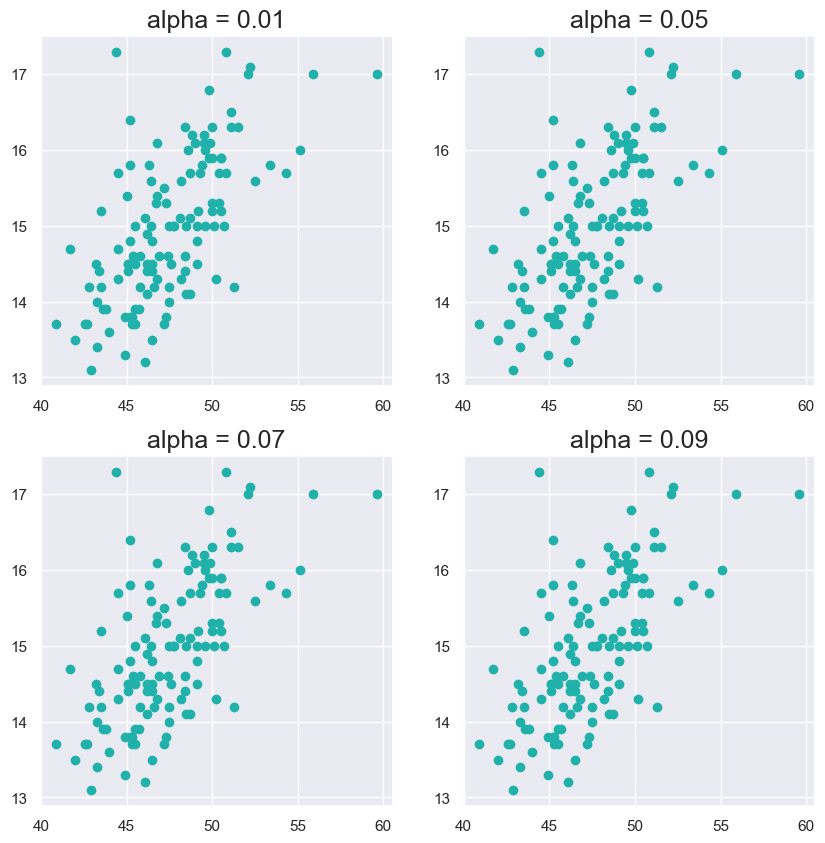

In [27]:
# Possible choices of learning rate 
alphas = [0.01, 0.05, 0.07, 0.09]

domain = np.linspace(np.min(X) - .5, np.max(X) + .5, 100)

# Call the subplots method for plotting a grid of figures
fig, axs = plt.subplots(2, 2, figsize=(10,10))

# Loop over the axs and alpha values
for ax, alpha in zip(axs.flat, alphas):
    node = SingleNeuron(linear_activation)
    node.train(X, y, alpha = alpha, epochs = 1_000)
    ax.plot(domain, node.predict(domain.reshape(-1, 1)))
    ax.scatter(X, y, color = "lightseagreen")
    ax.set_title(f"alpha = {alpha}", fontsize = 18)